In [6]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format 

In [7]:
base_url = "https://raw.githubusercontent.com/datarisk-io/datarisk-case-ds-junior/177db4cc1cc2dc883e1f7f1cb205ceda365fe51d/data/"

# Nomes dos arquivos
file_names = {
    "base_cadastral": "base_cadastral.csv",
    "base_info": "base_info.csv",
    "base_pagamentos_desenvolvimento": "base_pagamentos_desenvolvimento.csv",
    "base_pagamentos_teste": "base_pagamentos_teste.csv"
}

# Caminho para a pasta raw
raw_data_path = "../data/raw/"


# Dicionário para armazenar os dataframes
dataframes = {}

# Iterar sobre os arquivos, baixar, ler e salvar
for df_name, file_name in file_names.items():
    file_url = base_url + file_name
    local_file_path = os.path.join(raw_data_path, file_name)

    print(f"Baixando e lendo {file_name}...")
    try:
        # Ler o arquivo diretamente da URL
        dataframes[df_name] = pd.read_csv(file_url, sep=";")

        # Salvar o arquivo localmente na pasta raw
        dataframes[df_name].to_csv(local_file_path, sep=";", index=False)
        print(f"Arquivo {file_name} salvo em {local_file_path}")
    except Exception as e:
        print(f"Erro ao processar {file_name}: {e}")

data_cadastro = dataframes["base_cadastral"]
data_hist = dataframes["base_info"]
data_pagamentos = dataframes["base_pagamentos_desenvolvimento"]
data_objetivo = dataframes["base_pagamentos_teste"]

print("\nArquivos carregados e salvos com sucesso!")


Baixando e lendo base_cadastral.csv...
Arquivo base_cadastral.csv salvo em ../data/raw/base_cadastral.csv
Baixando e lendo base_info.csv...
Arquivo base_info.csv salvo em ../data/raw/base_info.csv
Baixando e lendo base_pagamentos_desenvolvimento.csv...
Arquivo base_pagamentos_desenvolvimento.csv salvo em ../data/raw/base_pagamentos_desenvolvimento.csv
Baixando e lendo base_pagamentos_teste.csv...
Arquivo base_pagamentos_teste.csv salvo em ../data/raw/base_pagamentos_teste.csv

Arquivos carregados e salvos com sucesso!


# Análise exploratória

## Análise da base cadastral

In [8]:
#Visualização inicial
data_cadastro.head()

,ID_CLIENTE,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG
0,1661240395903230676,2013-08-22,99,NaN,Serviços,YAHOO,PEQUENO,65
1,8274986328479596038,2017-01-25,31,NaN,Comércio,YAHOO,MEDIO,77
2,345447888460137901,2000-08-15,75,NaN,Serviços,HOTMAIL,PEQUENO,48
3,1003144834589372198,2017-08-06,49,NaN,Serviços,OUTLOOK,PEQUENO,89
4,324916756972236008,2011-02-14,88,NaN,Serviços,GMAIL,GRANDE,62


In [9]:
data_cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID_CLIENTE           1315 non-null   int64 
 1   DATA_CADASTRO        1315 non-null   object
 2   DDD                  1078 non-null   object
 3   FLAG_PF              66 non-null     object
 4   SEGMENTO_INDUSTRIAL  1232 non-null   object
 5   DOMINIO_EMAIL        1285 non-null   object
 6   PORTE                1274 non-null   object
 7   CEP_2_DIG            1315 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.3+ KB


In [10]:
#Observamos que existem colunas em tipos diferentes, como por exemplo, as colunas do tipo da data
#que é do tipo object, mas deveria ser do tipo datetime. Além disso, observamos que existem colunas com valores nulos.

#Para resolver isso vamos criar uma função para converter as colunas de data para o tipo datetime.

def converter_data(data, coluna):
    data[coluna] = pd.to_datetime(data[coluna], errors='coerce')
    return data



In [11]:
#Convertendo as colunas de data para datetime

data_cadastro_convertido = (
    data_cadastro.copy()
    .pipe(converter_data, coluna = 'DATA_CADASTRO')
)

data_cadastro_convertido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_CLIENTE           1315 non-null   int64         
 1   DATA_CADASTRO        1315 non-null   datetime64[ns]
 2   DDD                  1078 non-null   object        
 3   FLAG_PF              66 non-null     object        
 4   SEGMENTO_INDUSTRIAL  1232 non-null   object        
 5   DOMINIO_EMAIL        1285 non-null   object        
 6   PORTE                1274 non-null   object        
 7   CEP_2_DIG            1315 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 82.3+ KB


In [12]:
#A coluna DDD é uma coluna que adiciona informação geográfica, porém temos outra coluna que também faz
#isso que é a coluna CEP_2_DIG. Vamos remover a coluna DDD, pois a do cep não possui nulos.

data_cadastro_ddd_remove = (
    data_cadastro_convertido.copy()
    .drop(columns = ['DDD'])
)

data_cadastro_ddd_remove.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_CLIENTE           1315 non-null   int64         
 1   DATA_CADASTRO        1315 non-null   datetime64[ns]
 2   FLAG_PF              66 non-null     object        
 3   SEGMENTO_INDUSTRIAL  1232 non-null   object        
 4   DOMINIO_EMAIL        1285 non-null   object        
 5   PORTE                1274 non-null   object        
 6   CEP_2_DIG            1315 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 72.0+ KB


In [13]:
#Continuando, vamos ajustar a coluna de FLAG_PF para não possuir nulos.

data_cadastro_flag_pf = (
    data_cadastro_ddd_remove.copy()
    .fillna(value = 'PJ')
    .replace(to_replace = 'X', value = 'PF')
)

data_cadastro_flag_pf['FLAG_PF'].value_counts()


FLAG_PF
PJ    1249
PF      66
Name: count, dtype: int64

## Analise da base de informações dos clientes

In [14]:
#Visualização inicial
data_hist.head()

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,1661240395903230676,2018-09,16913.00,NaN
1,8274986328479596038,2018-09,106430.00,141.00
2,345447888460137901,2018-09,707439.00,99.00
3,1003144834589372198,2018-09,239659.00,96.00
4,324916756972236008,2018-09,203123.00,103.00


In [15]:
data_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24401 entries, 0 to 24400
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID_CLIENTE          24401 non-null  int64  
 1   SAFRA_REF           24401 non-null  object 
 2   RENDA_MES_ANTERIOR  23684 non-null  float64
 3   NO_FUNCIONARIOS     23149 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 762.7+ KB


In [16]:
#Observamos novamente colunas de data em formato errado, e alguns nulos em renda_mes_anterior e no_funcionarios
# Vamos resolver isso convertendo os tipos e com a função ffill e bfill.

data_hist_convertido_e_nulos = (
    data_hist.copy()
    .pipe(converter_data, coluna = 'SAFRA_REF')
    .sort_values(['ID_CLIENTE', 'SAFRA_REF'])
    .groupby('ID_CLIENTE')
    .apply(lambda g: g.ffill().bfill())
    .reset_index(drop=True)
)

data_hist_convertido_e_nulos.isnull().sum()



C:\Users\Arthur\AppData\Local\Temp\ipykernel_20272\3898198020.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.ffill().bfill())


ID_CLIENTE             0
SAFRA_REF              0
RENDA_MES_ANTERIOR     2
NO_FUNCIONARIOS       11
dtype: int64

In [17]:
#Ainda possuimos alguns nulos, porem isso se trata de clientes que não possuem histórico de pagamentos.
#Vamos resolver isso no futuro cruzando com a base de informação cadastral e tentar posteriormente
#um fill com a média por porte e área de atuação.

data_hist_convertido_e_nulos.head()

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
0,8784237149961904,2018-09-01,300502.00,107.00
1,8784237149961904,2018-10-01,499238.00,98.00
2,8784237149961904,2018-11-01,256117.00,104.00
3,8784237149961904,2018-12-01,433897.00,105.00
4,8784237149961904,2019-01-01,370549.00,112.00


In [18]:
data_hist_convertido_e_nulos.describe()

,ID_CLIENTE,SAFRA_REF,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
count,24401.00,24401,24399.00,24390.00
mean,4668214159782658048.00,2020-05-05 20:33:41.228638208,288659.56,117.78
min,8784237149961904.00,2018-09-01 00:00:00,105.00,0.00
25%,2347028805684088320.00,2019-07-01 00:00:00,133874.50,106.00
50%,4795152981525833728.00,2020-06-01 00:00:00,241184.00,118.00
75%,7061868716439557120.00,2021-03-01 00:00:00,392281.00,131.00
max,9206030810342980608.00,2021-12-01 00:00:00,1682759.00,198.00
std,2669294096683301376.00,NaN,211383.23,21.44


## Análise da base de pagamentos

In [19]:
data_pagamentos.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99


In [20]:
data_pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_CLIENTE              77414 non-null  int64  
 1   SAFRA_REF               77414 non-null  object 
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  object 
 3   DATA_PAGAMENTO          77414 non-null  object 
 4   DATA_VENCIMENTO         77414 non-null  object 
 5   VALOR_A_PAGAR           76244 non-null  float64
 6   TAXA                    77414 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.1+ MB


In [21]:
#Observamos algumas colunas de datas em formato errado, e também algumas colunas com valores nulos.
data_pagamentos_convertido = (
    data_pagamentos.copy()
    .pipe(converter_data, coluna = 'SAFRA_REF')
    .pipe(converter_data, coluna = 'DATA_EMISSAO_DOCUMENTO')
    .pipe(converter_data, coluna = 'DATA_PAGAMENTO')
    .pipe(converter_data, coluna = 'DATA_VENCIMENTO')
)

data_pagamentos_convertido.dtypes


ID_CLIENTE                         int64
SAFRA_REF                 datetime64[ns]
DATA_EMISSAO_DOCUMENTO    datetime64[ns]
DATA_PAGAMENTO            datetime64[ns]
DATA_VENCIMENTO           datetime64[ns]
VALOR_A_PAGAR                    float64
TAXA                             float64
dtype: object

In [22]:
data_pagamentos_convertido.shape

(77414, 7)

In [23]:
#Vamos remover alguns dados que não são concistentes temporalmente

def remover_datas_invalidas(df):
    return df[
        (df['DATA_PAGAMENTO'] >= df['DATA_EMISSAO_DOCUMENTO']) &
        (df['DATA_VENCIMENTO'] >= df['DATA_EMISSAO_DOCUMENTO'])
    ]



data_pagamentos_convertido = (
    data_pagamentos_convertido
    .pipe(remover_datas_invalidas)

)

data_pagamentos_convertido.shape


(77367, 7)

In [24]:
#Vamos criar algumas colunas também que poderam ser úteis para o modelo.

data_pagamentos_new_columns = (
    data_pagamentos_convertido.copy()
    .assign(
        DIAS_ATE_PAGAMENTO = (
            lambda d: (d["DATA_PAGAMENTO"] - d["DATA_EMISSAO_DOCUMENTO"]).dt.days
        )
    )
    .assign(
        INADIMPLENTE = (
            lambda d: np.where(
                (d["DATA_PAGAMENTO"] - d["DATA_VENCIMENTO"]).dt.days >= 5, 1, 0
            )
        )
    )
    .assign(
        DIAS_DE_ATRASO = (
            lambda d: (d["DATA_PAGAMENTO"] - d["DATA_VENCIMENTO"]).dt.days
        )
    )
    .assign(
        PRAZO_PAGAMENTO_DIAS = (
            lambda d: (d["DATA_VENCIMENTO"] - d["DATA_EMISSAO_DOCUMENTO"]).dt.days
        )
    )
)

data_pagamentos_new_columns.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DIAS_ATE_PAGAMENTO,INADIMPLENTE,DIAS_DE_ATRASO,PRAZO_PAGAMENTO_DIAS
0,1661240395903230676,2018-08-01,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,20,0,0,20
1,1661240395903230676,2018-08-01,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,23,0,1,22
2,1661240395903230676,2018-08-01,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,23,0,1,22
3,1661240395903230676,2018-08-01,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,42,1,6,36
4,1661240395903230676,2018-08-01,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,20,0,0,20


In [25]:
#Para preencher os valores nulos em VALOR_A_PAGAR e em TAXA, primeiro precisamos entender o que é cada uma delas.

data_pagamentos_new_columns['TAXA'].describe()


count   77367.00
mean        6.79
std         1.80
min         4.99
25%         5.99
50%         5.99
75%         6.99
max        11.99
Name: TAXA, dtype: float64

<Axes: >

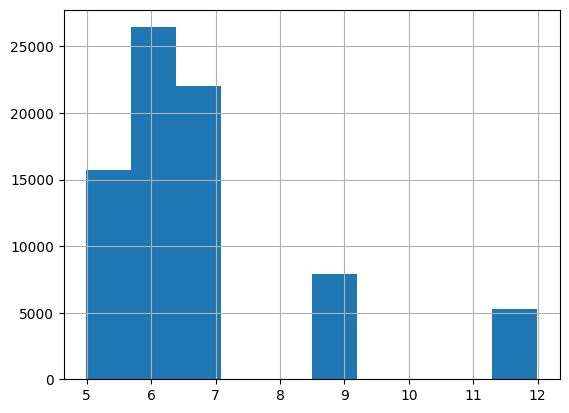

In [26]:
data_pagamentos_new_columns['TAXA'].hist()

In [27]:
# A estratégia para preencher os valores nulos em 'taxa' é utilizar a média
# de taxas para cada 'ID_CLIENTE', e caso restar nulos preenchemos com a média geral.

def preencher_taxa(df):
    media_taxa_por_cliente = df.groupby('ID_CLIENTE')['TAXA'].transform('mean')
    taxa_preenchida = df['TAXA'].fillna(media_taxa_por_cliente)

    # Preenche com a média geral se ainda restarem nulos
    media_geral = taxa_preenchida.mean()
    taxa_final = taxa_preenchida.fillna(media_geral)

    df['TAXA'] = taxa_final
    return df


data_pagamentos_fill_taxa = (
    data_pagamentos_new_columns.copy()
    .pipe(preencher_taxa)
    
)


Informações sobre valores nulos após o tratamento:
ID_CLIENTE                   0
SAFRA_REF                    0
DATA_EMISSAO_DOCUMENTO       0
DATA_PAGAMENTO               0
DATA_VENCIMENTO              0
VALOR_A_PAGAR             1170
TAXA                         0
DIAS_ATE_PAGAMENTO           0
INADIMPLENTE                 0
DIAS_DE_ATRASO               0
PRAZO_PAGAMENTO_DIAS         0
dtype: int64


<Axes: >

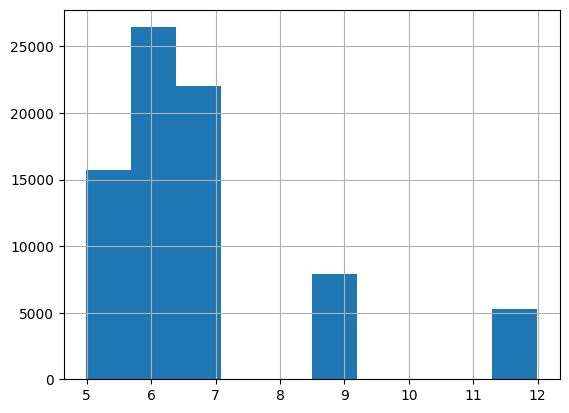

In [28]:
#Verificando o preenchimento da taxa
print("\nInformações sobre valores nulos após o tratamento:")
print(data_pagamentos_fill_taxa.isnull().sum())

data_pagamentos_fill_taxa['TAXA'].describe()
data_pagamentos_fill_taxa['TAXA'].hist()

In [29]:
#Para o preenchimento do valor a pagar, precisamos primeiro também dar uma entendida na variável
data_pagamentos_fill_taxa['VALOR_A_PAGAR'].describe()

count     76197.00
mean      46571.85
std       46280.31
min           0.10
25%       18769.06
50%       34762.78
75%       60933.95
max     4400000.00
Name: VALOR_A_PAGAR, dtype: float64

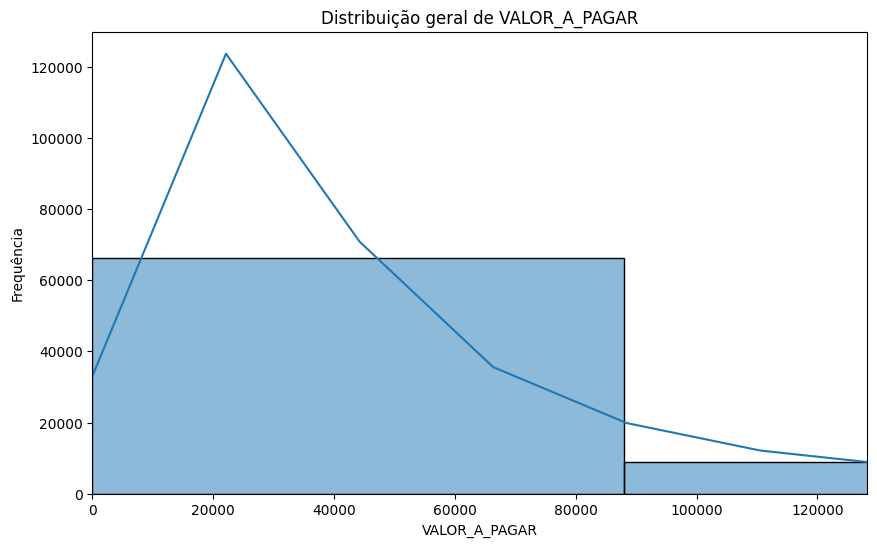

In [30]:
#Vemos um desvio muito grande, bem como valores máximos e minimos oscilando bastante

plt.figure(figsize=(10, 6))
sns.histplot(data_pagamentos_fill_taxa['VALOR_A_PAGAR'], bins=50, kde=True)
plt.title('Distribuição geral de VALOR_A_PAGAR')
plt.xlabel('VALOR_A_PAGAR')
plt.ylabel('Frequência')
plt.xlim(0, data_pagamentos_fill_taxa['VALOR_A_PAGAR'].quantile(0.95))  # Limita os 5% maiores
plt.show()

In [31]:
#A distribuição é assimétrica à direita
#Isso significa que a maioria dos valores está concentrada nos menores valores (ex: até 30.000), 
#mas existem valores altos que esticam a cauda da distribuição
#ou seja, há outliers ou valores extremos grandes.

In [32]:
data_pagamentos_fill_taxa['ID_CLIENTE'].value_counts().describe()


count   1247.00
mean      62.04
std       94.39
min        1.00
25%        5.00
50%       28.00
75%       90.00
max     1151.00
Name: count, dtype: float64

In [33]:
#Temos alguns clientes que comprar muito

In [34]:
data_pagamentos_fill_taxa['ID_CLIENTE'].value_counts().head(10)
#Top 10 compradores


ID_CLIENTE
6964108750473070287    1151
5761480994209806499    1055
4008627434689715639     877
8173830874846355280     675
6916556752218696485     638
7930925883736021864     585
459290606780222306      557
4045739494965095560     539
7325545718770538459     509
3355881107559250653     505
Name: count, dtype: int64

In [35]:
#Para preencher os valores a pagar, vamos fazer a seguinte estratégia
#preencher primeiro com a média dos antigos pagamentos por clientes
#caso não tenha pagamentos, vamos preencher com a mediana geral

def preencher_valor_a_pagar(df):
    #média por cliente
    media_por_cliente = df.groupby('ID_CLIENTE')['VALOR_A_PAGAR'].transform('mean')

    #aplicar a média do cliente onde for possível
    df['VALOR_A_PAGAR'] = df['VALOR_A_PAGAR'].fillna(media_por_cliente)

    #preencher o restante com a mediana geral (robusta a outliers)
    mediana_geral = df['VALOR_A_PAGAR'].median()
    df['VALOR_A_PAGAR'] = df['VALOR_A_PAGAR'].fillna(mediana_geral)

    return df

data_pagamentos_fill_valor = (
    data_pagamentos_fill_taxa.copy()
    .pipe(preencher_valor_a_pagar)
)


In [36]:
#Verificando o preenchimento do valor
print("\nInformações sobre valores nulos após o tratamento:")
print(data_pagamentos_fill_valor.isnull().sum())

data_pagamentos_fill_valor['VALOR_A_PAGAR'].describe()



Informações sobre valores nulos após o tratamento:
ID_CLIENTE                0
SAFRA_REF                 0
DATA_EMISSAO_DOCUMENTO    0
DATA_PAGAMENTO            0
DATA_VENCIMENTO           0
VALOR_A_PAGAR             0
TAXA                      0
DIAS_ATE_PAGAMENTO        0
INADIMPLENTE              0
DIAS_DE_ATRASO            0
PRAZO_PAGAMENTO_DIAS      0
dtype: int64


count     77367.00
mean      46566.04
std       46065.97
min           0.10
25%       18860.18
50%       34825.88
75%       60866.79
max     4400000.00
Name: VALOR_A_PAGAR, dtype: float64

In [37]:
data_pagamentos_fill_valor['INADIMPLENTE'].value_counts()
#Confirmando também um desbalanceamento que será trabalho mais a frente

INADIMPLENTE
0    71957
1     5410
Name: count, dtype: int64

## Analise base objetivo
### Padronizando variáveis somenete

In [38]:
data_objetivo.head()

,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA
0,5058298901476893676,2021-07,2021-07-14,2021-08-04,11204.75,4.99
1,274692171162531764,2021-07,2021-07-08,2021-08-23,60718.50,5.99
2,274692171162531764,2021-07,2021-07-11,2021-08-25,60718.50,5.99
3,274692171162531764,2021-07,2021-07-16,2021-08-30,62250.00,5.99
4,465309249432033993,2021-07,2021-07-05,2021-07-30,26593.95,6.99


In [39]:


data_objetivo_convertido = (
    data_objetivo.copy()
    .pipe(converter_data, coluna = 'SAFRA_REF')
    .pipe(converter_data, coluna = 'DATA_EMISSAO_DOCUMENTO')
    .pipe(converter_data, coluna = 'DATA_VENCIMENTO')

)
data_objetivo_convertido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12275 entries, 0 to 12274
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              12275 non-null  int64         
 1   SAFRA_REF               12275 non-null  datetime64[ns]
 2   DATA_EMISSAO_DOCUMENTO  12275 non-null  datetime64[ns]
 3   DATA_VENCIMENTO         12275 non-null  datetime64[ns]
 4   VALOR_A_PAGAR           12144 non-null  float64       
 5   TAXA                    12275 non-null  float64       
dtypes: datetime64[ns](3), float64(2), int64(1)
memory usage: 575.5 KB


# Salvando bases intermediarias

In [40]:
#Salvando em Parquet 

data_objetivo_convertido.to_parquet('../data/intermediate/data_objetivo.parquet', index=False, engine='fastparquet')
data_pagamentos_fill_valor.to_parquet('../data/intermediate/data_pagamentos.parquet', index=False, engine='fastparquet')
data_hist_convertido_e_nulos.to_parquet('../data/intermediate/data_hist.parquet', index=False, engine='fastparquet')
data_cadastro_flag_pf.to_parquet('../data/intermediate/data_cadastro.parquet', index=False, engine='fastparquet')


# Lendo de volta do Parquet (Para manter os tipos convertidos)
df_lido_parquet = pd.read_parquet('../data/intermediate/data_pagamentos.parquet', engine='fastparquet')


# Comparando os tipos de dados
print("\n--- Tipos de dados ---")
print("Original:")
print(data_pagamentos.dtypes)
print("\nLido do Parquet:")
print(df_lido_parquet.dtypes)


--- Tipos de dados ---
Original:
ID_CLIENTE                  int64
SAFRA_REF                  object
DATA_EMISSAO_DOCUMENTO     object
DATA_PAGAMENTO             object
DATA_VENCIMENTO            object
VALOR_A_PAGAR             float64
TAXA                      float64
dtype: object

Lido do Parquet:
ID_CLIENTE                         int64
SAFRA_REF                 datetime64[ns]
DATA_EMISSAO_DOCUMENTO    datetime64[ns]
DATA_PAGAMENTO            datetime64[ns]
DATA_VENCIMENTO           datetime64[ns]
VALOR_A_PAGAR                    float64
TAXA                             float64
DIAS_ATE_PAGAMENTO                 int64
INADIMPLENTE                       int64
DIAS_DE_ATRASO                     int64
PRAZO_PAGAMENTO_DIAS               int64
dtype: object
